# Data Scientist Professional Practical Exam Submission


## Data Validation

The received dataset contains 947 rows and 8 columns. I have thoroughly validated all variables and removed 52 rows where nutritional data was missing, leaving us with 895 rows. All the columns align with the descriptions provided in the data dictionary:

- recipe: Numeric, without missing values, same as the description. No cleaning is needed.
- calories: Numeric, with 52 missing values, which were dropped.
- carbohydrate: Numeric, with 52 missing values, which were dropped.
- sugar: Numeric, with 52 missing values, which were dropped.
- protein: Numeric, with 52 missing values, which were dropped.
- category: Categorical, with 10 categories and no missing values. I identified "Chicken Breast" and adjusted it to "Chicken" to match the data description.
- servings: Originally contained some non-categorical string values, which were removed, and the column was converted to a categorical variable with no missing values.
- high_traffic: Numeric, with no missing values. I transformed it into a binary variable where "high" corresponds to 1.

In [1]:
# Import packages for data analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import missingno as msno

# Import packages for machine learning.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Set plot style
plt.style.use('ggplot')

In [2]:
# Create df from recipe_site_traffic_2212 data set.
df = pd.read_csv("recipe_site_traffic_2212.csv")

# Visualize df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [3]:
# Visualize df head
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


### Validation and Cleaning: high_traffic
I transformed it into a binary variable where "high" corresponds to 1.

In [4]:
# Check possible values
df["high_traffic"].unique()

array(['High', nan], dtype=object)

In [5]:
# Replace nan with 0
df["high_traffic"] = df["high_traffic"].fillna("0")

# Chance "High" values for 1
df["high_traffic"] = df["high_traffic"].str.replace("High", "1")

# Transform column to int
df["high_traffic"] = df["high_traffic"].astype("int")

# Check results
df["high_traffic"].value_counts()

1    574
0    373
Name: high_traffic, dtype: int64

### Check Missingness Pattern
There are 52 recipes with missing nutritional information, which represents approximately 5% of the dataset. Since each recipe has its unique characteristics, and the number of missing values will not significantly impact the analysis, I have decided to remove them.

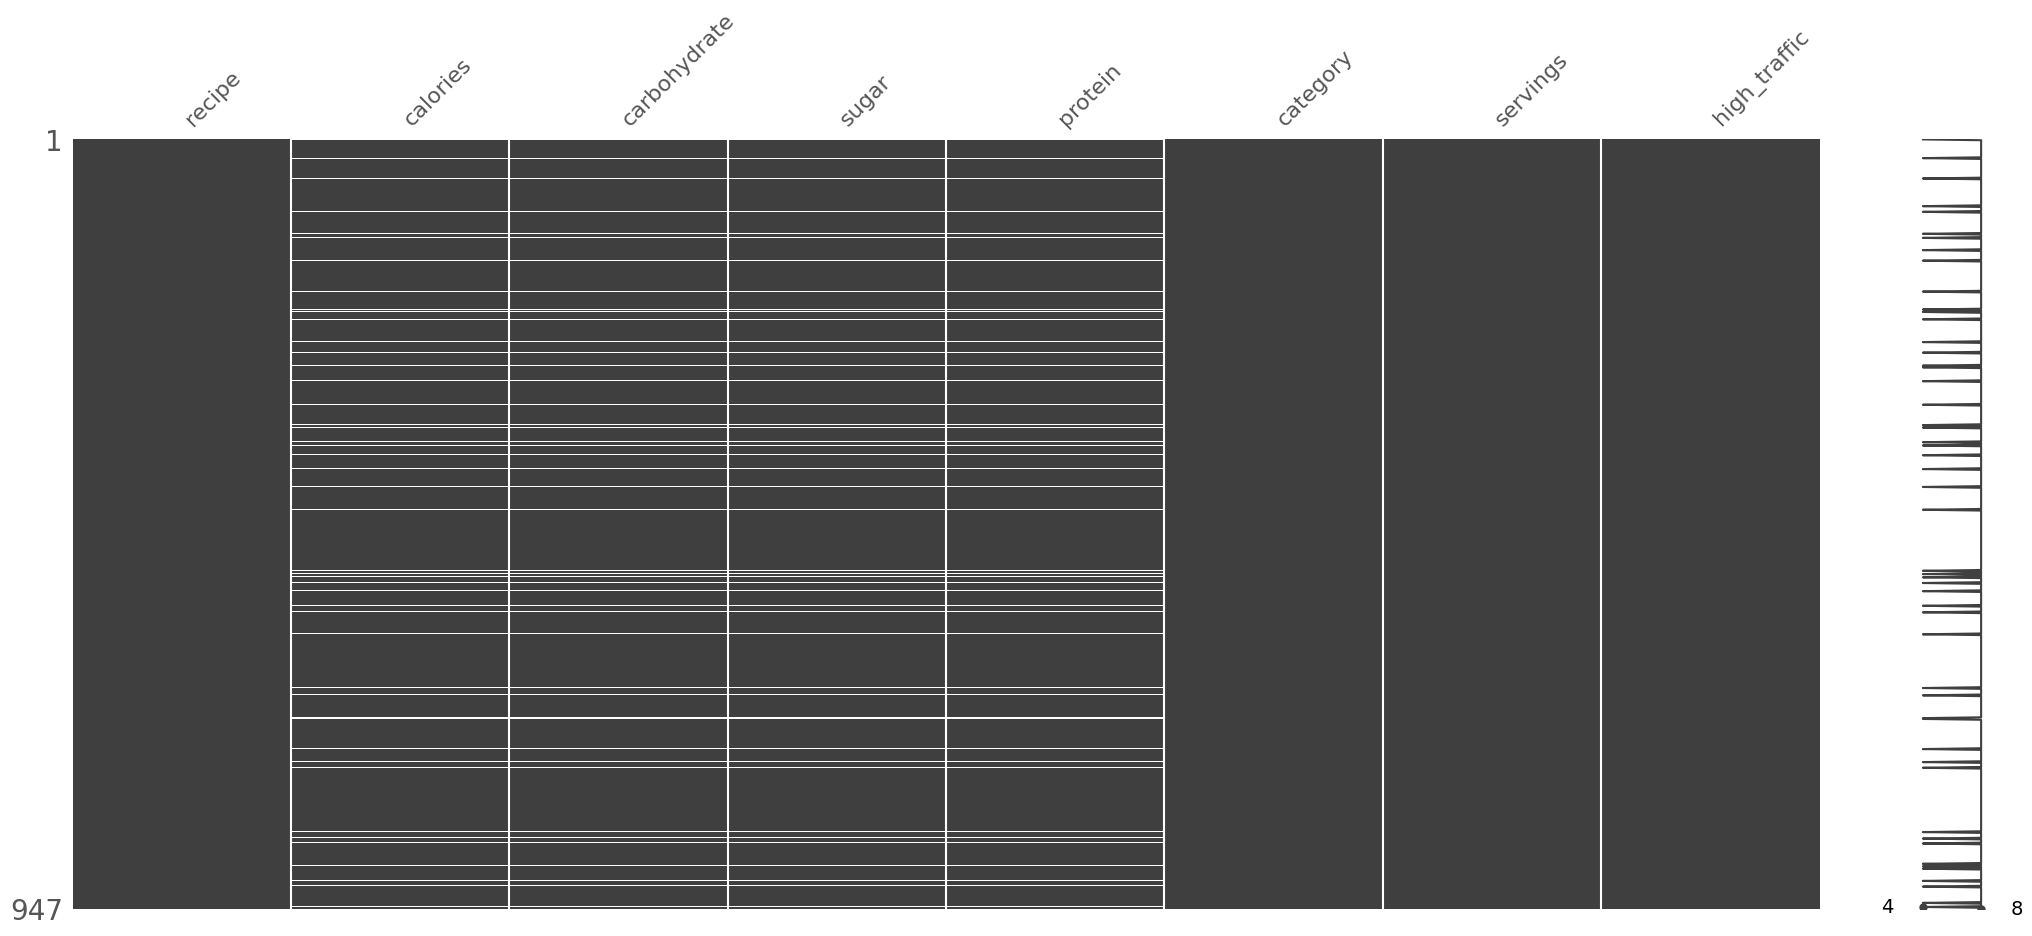

In [6]:
# Evaluate missingness patterns
msno.matrix(df)
plt.show()

In [7]:
# Remove missing values
df = df.dropna()

print(len(df))

895


### Validation and Cleaning: recipe
Confirmed that each recipe has a unique identifier.

In [8]:
# Validate recipe uniquenes
df["recipe"].nunique()

895

### Validation and Cleaning: category
Identified a column named "Chicken Breast" that was not specified in the received data information. These values were reclassified as "Chicken" and the column was subsequently transformed into a categorical variable.

In [9]:
# Check consistency of possible groups.
df["category"].value_counts()

Breakfast         106
Chicken Breast     94
Beverages          92
Potato             83
Lunch/Snacks       82
Vegetable          78
Dessert            77
Meat               74
Pork               73
Chicken            69
One Dish Meal      67
Name: category, dtype: int64

In [10]:
# Adjust "Chicken Breast" to "Chicken"
df["category"] = df["category"].str.replace("Chicken Breast", "Chicken")

# Transform to dtype category
df["category"] = df["category"].astype("category")

# Validate adjustment
df["category"].value_counts()

Chicken          163
Breakfast        106
Beverages         92
Potato            83
Lunch/Snacks      82
Vegetable         78
Dessert           77
Meat              74
Pork              73
One Dish Meal     67
Name: category, dtype: int64

### Validation and Cleaning: servings
Identified values containing strings within the column, cleaned the data, and subsequently transformed the column into a categorical variable.

In [11]:
# Check serving sizes
df["servings"].unique()

array(['4', '1', '2', '6', '4 as a snack', '6 as a snack'], dtype=object)

In [12]:
# Remove " as a snack"
df["servings"] = df["servings"].str.strip(" as a snack")

# Transform to dtype category
df["servings"] = df["servings"].astype("category")

# Validate adjustment
df["servings"].value_counts(normalize=True)

4    0.410056
6    0.206704
2    0.194413
1    0.188827
Name: servings, dtype: float64

### Validation and Cleaning: Nutritional Information (calories, carbohydrate, sugar, protein)

In [13]:
# Validate any negative values
df[["calories","carbohydrate", "sugar", "protein"]].describe()

,calories,carbohydrate,sugar,protein
count,895.000000,895.000000,895.000000,895.000000
mean,435.939196,35.069676,9.046547,24.149296
std,453.020997,43.949032,14.679176,36.369739
min,0.140000,0.030000,0.010000,0.000000
25%,110.430000,8.375000,1.690000,3.195000
50%,288.550000,21.480000,4.550000,10.800000
75%,597.650000,44.965000,9.800000,30.200000
max,3633.160000,530.420000,148.750000,363.360000


### End Data Validation

In [14]:
# Check df after cleaning process.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        895 non-null    int64   
 1   calories      895 non-null    float64 
 2   carbohydrate  895 non-null    float64 
 3   sugar         895 non-null    float64 
 4   protein       895 non-null    float64 
 5   category      895 non-null    category
 6   servings      895 non-null    category
 7   high_traffic  895 non-null    int64   
dtypes: category(2), float64(4), int64(2)
memory usage: 51.3 KB


## Exploratory Analysis
After investigating the target variable and the features of the recipes, as well as assessing the relationship between the target variable and the features, I have decided to implement the following changes to facilitate modeling:

- Nutritional Information: I will exclude nutritional data from the modeling process due to concerns about data integrity.
- Category and Servings: I will perform one-hot encoding on the 'Category' and 'Servings' features.

### Target Variable - High Traffic

- As our primary objective is to predict whether a recipe will result in high traffic, the variable 'high_traffic' serves as our target variable.
- As demonstrated in the bar chart below, it is evident that the majority of recipes, accounting for 59.8%, generated high traffic when presented on the home page.
- The initial line chart also provides valuable insights, illustrating that specific categories consistently yield high traffic, while others do not.
- However, the box plot did not reveal any significant differences in the distributions of high-traffic recipes based on calorie amounts.
- Additionally, the horizontal bar plot demonstrates that larger serving sizes have a slightly larger proportion of high-traffic recipes

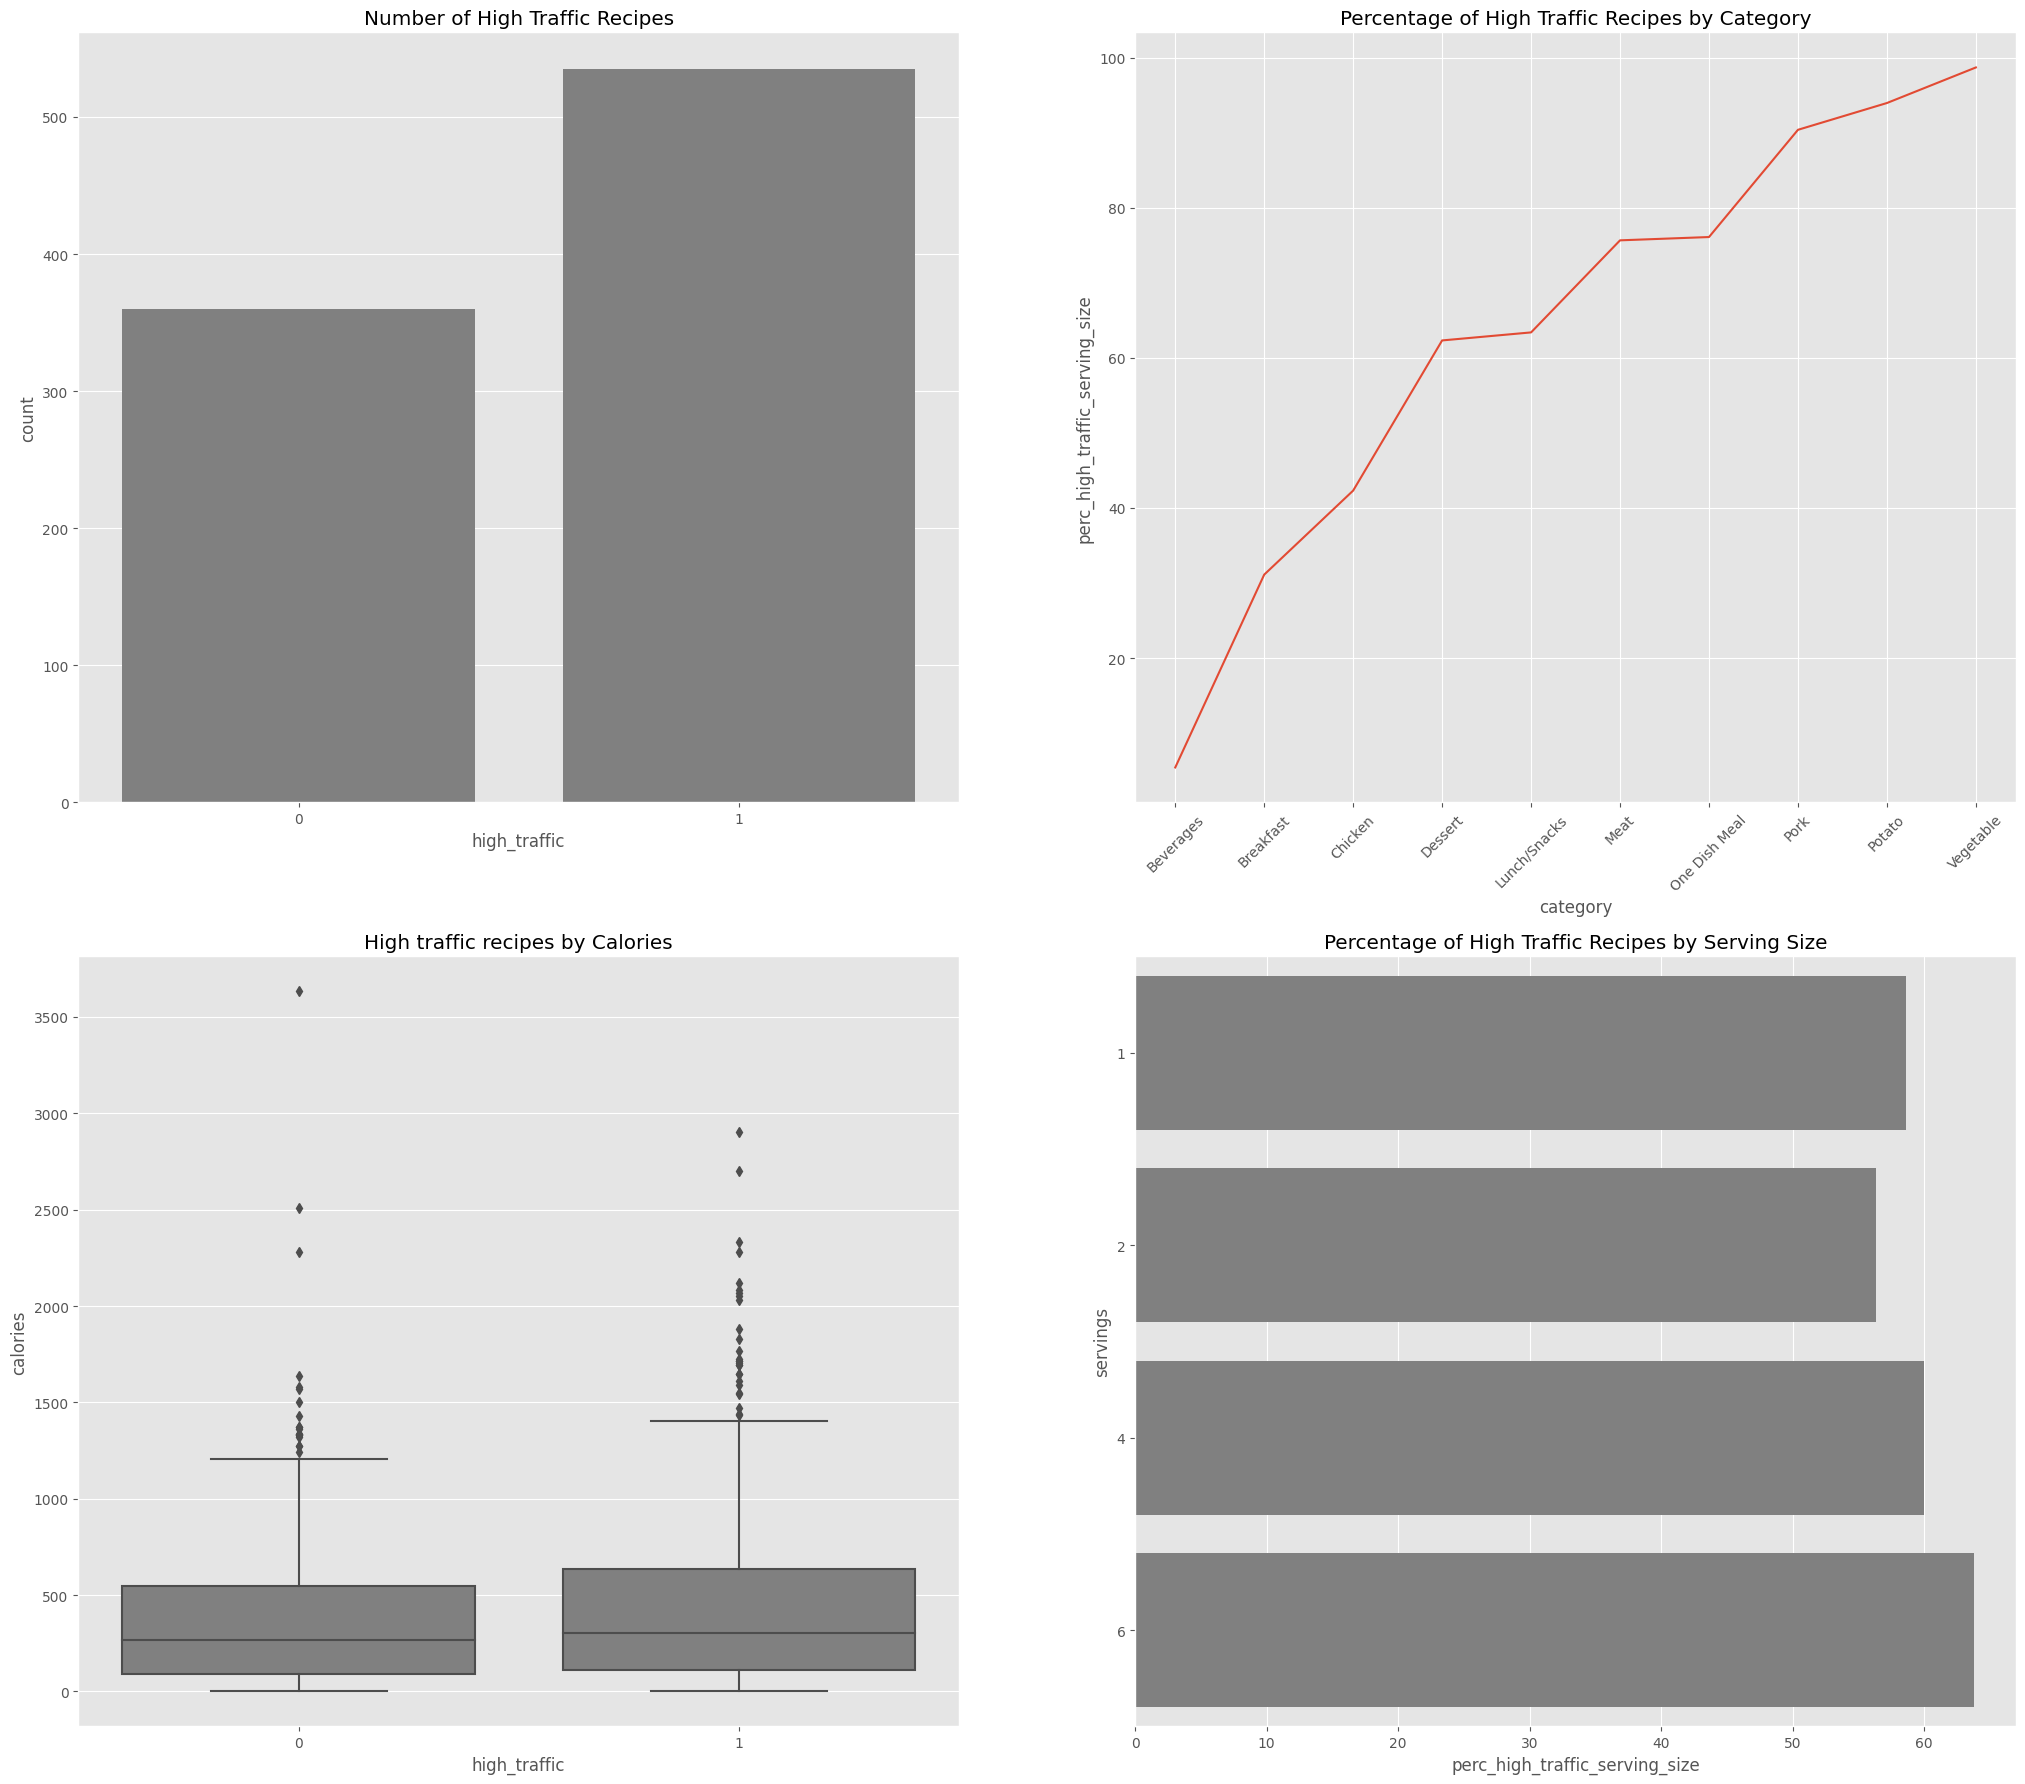

In [15]:
# Calculate the proportion of high traffic recipes for each category
proportion_high_traffic = df.groupby("category").agg({"recipe":"count", "high_traffic": "sum"}).reset_index()
proportion_high_traffic["perc_high_traffic_serving_size"] = round(proportion_high_traffic["high_traffic"] / proportion_high_traffic["recipe"] * 100, 2)

# Calculate the proportion of high traffic recipes for each serving size
proportion_servings = df.groupby("servings").agg({"recipe":"count", "high_traffic": "sum"}).reset_index()
proportion_servings["perc_high_traffic_serving_size"] = round(proportion_servings["high_traffic"] / proportion_servings["recipe"] * 100, 2)

# Plot Views
fig, axes = plt.subplots(2,2,figsize=(25,22))
sns.countplot(x="high_traffic", data=df, color="grey", ax=axes[0,0]).set(title="Number of High Traffic Recipes")
sns.lineplot(x="category", y="perc_high_traffic_serving_size", data=proportion_high_traffic, ax=axes[0,1]).set(title="Percentage of High Traffic Recipes by Category")
axes[0,1].tick_params(axis='x', rotation=45)
sns.boxplot(x="high_traffic", y="calories", data=df, color="grey", ax=axes[1,0]).set(title="High traffic recipes by Calories")
sns.barplot(x="perc_high_traffic_serving_size", y="servings", data=proportion_servings, orient="h", color="grey", ax=axes[1,1]).set(title="Percentage of High Traffic Recipes by Serving Size");

### Numeric Variables - Calories, Carbohydrate, Sugar, Protein
From the heatmap below, it can be concluded that there is no significant linear relationship between the numerical variables. This output suggests that our data may have an integrity problem. Given that calories are calculated as the sum of (carbohydrates * 4) + (protein * 4) + (fat * 9), and that sugar is essentially a subset of carbohydrates, it is not possible to have a negative correlation between calories and both carbohydrates and sugar.

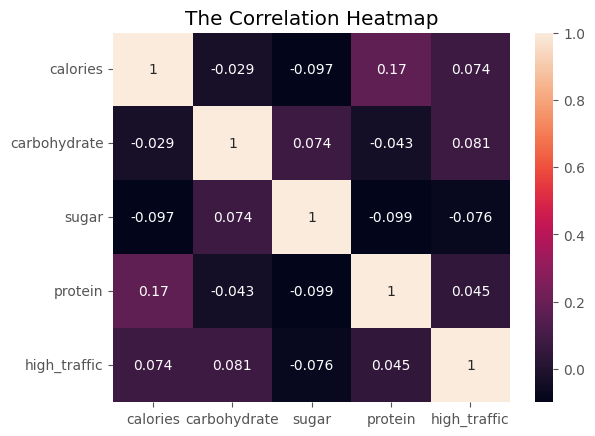

In [16]:
# Create df_corr to evaluate correlation between features.
df_corr = df[["calories","carbohydrate", "sugar", "protein", "high_traffic"]]

# Create a correlation matrix
heatmap = sns.heatmap(df_corr.corr(), annot=True)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
heatmap.set_title("The Correlation Heatmap")
plt.show()

As we advance in our investigation, we observe in the histograms below that all the nutritional fields exhibit positive skewness. The concentration of recipes with low calorie values might indicate that the calorie values are not accurate.

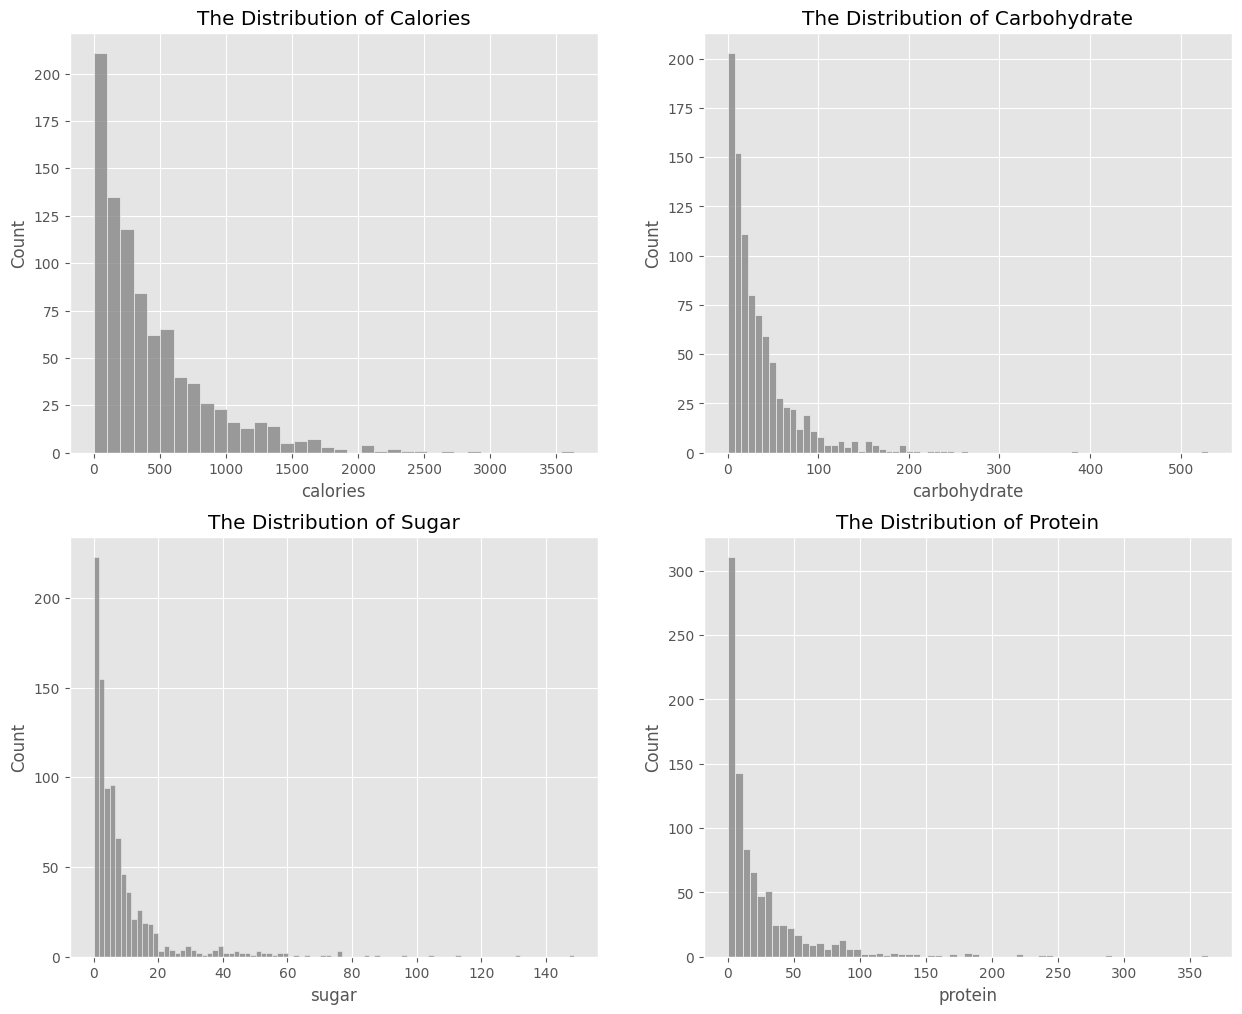

In [17]:
# Visualize data distribution
fig, axes = plt.subplots(2,2,figsize=(15,12))
sns.histplot(df['calories'],color='gray', ax=axes[0,0]).set(title='The Distribution of Calories')
sns.histplot(df['carbohydrate'],color='gray', ax=axes[0,1]).set(title='The Distribution of Carbohydrate')
sns.histplot(df['sugar'],color='gray', ax=axes[1,0]).set(title='The Distribution of Sugar')
sns.histplot(df['protein'],color='gray', ax=axes[1,1]).set(title='The Distribution of Protein');

In the scatterplot below, we can clearly observe a notable concentration of recipes in which the reported calorie values are lower than those calculated based on the provided values for carbohydrates, sugar, and protein. However, due to the absence of fat values, it remains uncertain whether the discrepancy lies solely in the calorie value or if there may be issues with other data points as well. Consequently, I believe it is prudent to exclude nutritional information from the modeling process.

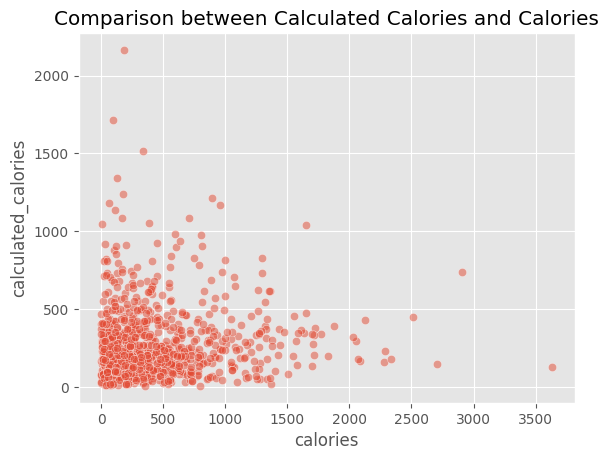

In [18]:
# Creates column calculated_calories to serve as a reference of the minimum value that the calories field should have based on the nutritional information avaliable.
df["calculated_calories"] = (df["carbohydrate"] * 4) + (df["sugar"] * 4) + (df["protein"] * 4)

# Plot views
sns.scatterplot(x="calories", y="calculated_calories", data=df, alpha=0.5).set(title="Comparison between Calculated Calories and Calories")
plt.show()

### Categorical Variables - Category, Serving Size
The distribution of recipes by category is generally balanced, except for 'Chicken,' which notably exceeds the number of recipes in other categories. Furthermore, the categories show similar quantities of recipes per serving size within each category. However, there is a higher concentration of values for serving size 4 across almost all categories, as expected, considering that 41% of the recipes feature this serving size.

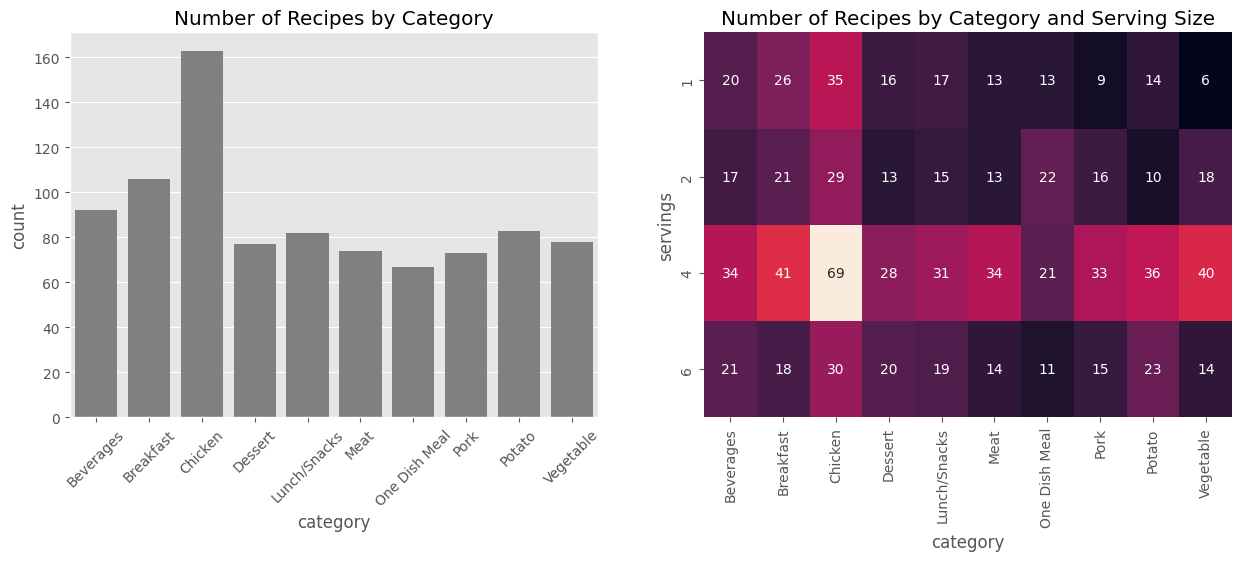

In [19]:
# Plot Views
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x="category", data=df, color="grey", ax=axes[0]).set(title="Number of Recipes by Category")
sns.heatmap(pd.crosstab(df["servings"], df["category"], values=df["recipe"], aggfunc="count"), annot=True, cbar=None).set(title="Number of Recipes by Category and Serving Size")
axes[0].tick_params(axis='x', rotation=45)

plt.show()

Given the decision to not use nutritional information in modeling, I have chosen to encode the categorical variables and assess their correlation with the target variable. The heatmap below illustrates that the 'category' variable exhibits a moderate correlation with high traffic.

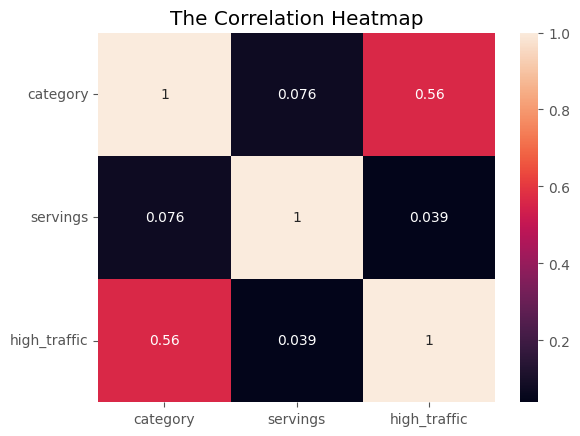

In [20]:
# Create df_corr to evaluate correlation between features.
df_corr = df[["category", "servings", "high_traffic"]]
df_corr["category"] = df_corr["category"].cat.codes
df_corr["servings"] = df_corr["servings"].cat.codes

# Create a correlation matrix
heatmap = sns.heatmap(df_corr.corr(), annot=True)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
heatmap.set_title("The Correlation Heatmap")

plt.show()

## Model Fitting & Evaluation
Predicting whether a recipe will generate significant web traffic poses a classification challenge in the realm of machine learning. For this task, I opted for the Logistic Regression model due to its capability to discern the correlation between the recipe category and the target variable.

To provide a benchmark for comparison, I also employed a Decision Tree Classification model. I chose the classification tree as a benchmark because of its capacity on capture non-linear relationships between features and lables.

In the model evaluation phase, I employed two key metrics: accuracy and precision. Accuracy measures the percentage of correct predictions, providing an overall assessment of the model's performance. On the other hand, precision evaluates the percentage of true positive predictions relative to the total predicted as positive.

### Prepare Data for Modelling
To enable modelling, we chose category and servings as features, and high_traffic as target variable. I also made the following changes:
- Convert the categorical variables into numeric features;
- Split the data into a training set and a test set.

In [21]:
#Define df_model
df_model = df[["recipe","high_traffic", "category", "servings"]].set_index("recipe")

# Encode "category" and "servings"
df_model = pd.get_dummies(df_model, columns=["category", "servings"])

# Create Features and Target variables
X = df_model.drop(labels="high_traffic", axis=1) #Features
y = df_model["high_traffic"] #Target

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Logistic Regression

In [23]:
# Create logistic regression model
log_reg = LogisticRegression()

# Fit the data
log_reg.fit(X_train, y_train)

LogisticRegression()

In [24]:
# Predict
y_pred = log_reg.predict(X_test)

# Calculate accuracy
print('Accuracy: ', round(accuracy_score(y_test,y_pred),2))
print('Precision: ',round(precision_score(y_test,y_pred),2))

Accuracy:  0.78
Precision:  0.85


### Finding Feature Importance

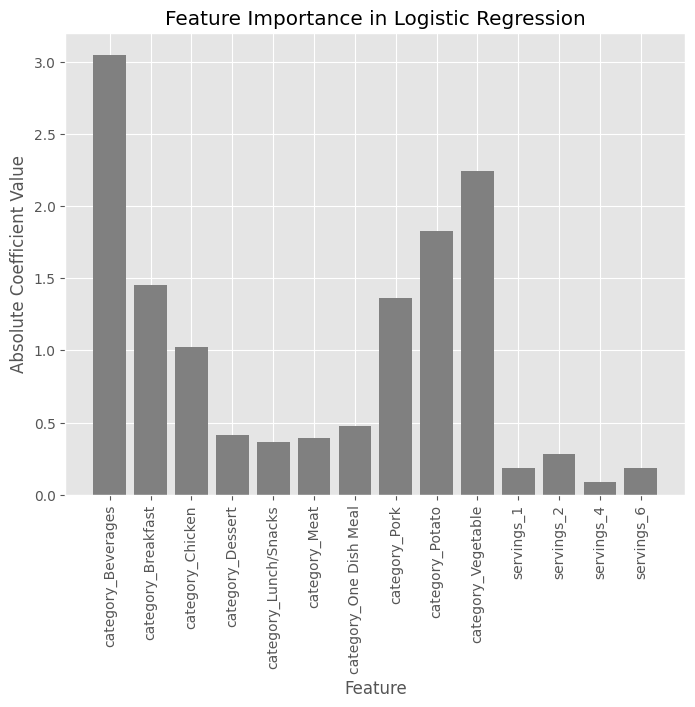

In [26]:
feature_importance = abs(log_reg.coef_[0])

plt.figure(figsize=(8, 6))
plt.bar(range(len(feature_importance)), feature_importance, color="gray")
plt.xticks(range(len(feature_importance)), X.columns, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Absolute Coefficient Value")
plt.title("Feature Importance in Logistic Regression")
plt.show()

### Decision Tree Classification Model

In [27]:
# Create Decision Tree model
dt = DecisionTreeClassifier(random_state=1)

# Fit the data
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [28]:
y_pred_2 = dt.predict(X_test)

print('Accuracy: ', round(accuracy_score(y_test,y_pred_2),2))
print('Precision: ',round(precision_score(y_test,y_pred_2),2))

Accuracy:  0.7
Precision:  0.85


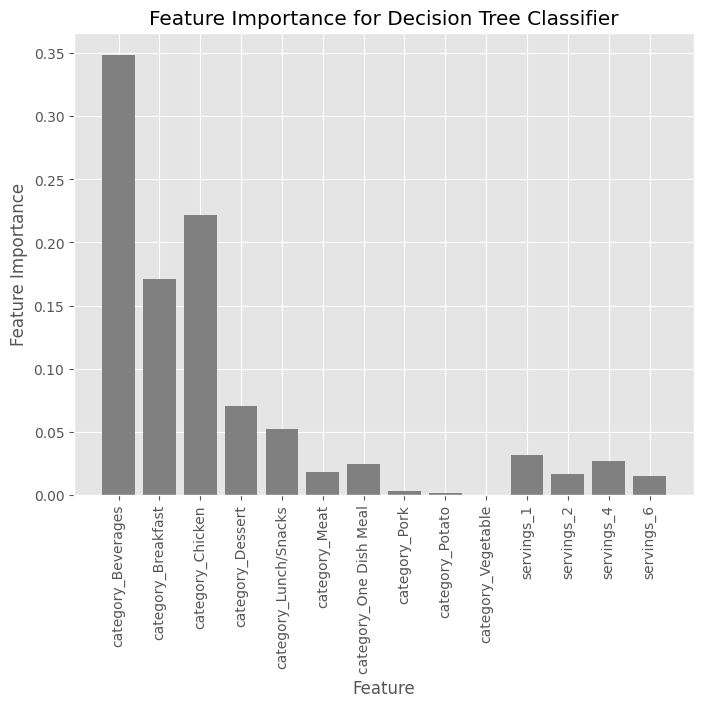

In [29]:
feature_importance = abs(dt.feature_importances_)

plt.figure(figsize=(8, 6))
plt.bar(range(len(feature_importance)), feature_importance, color="gray")
plt.xticks(range(len(feature_importance)), X.columns, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Feature Importance for Decision Tree Classifier")
plt.show()

## Results
The accuracy of the Logistic Regression and Decision Tree Classifier models is 0.78 and 0.7, respectively. This indicates that **Logistic Regression outperforms the Decision Tree Classifier in terms of overall prediction accuracy**.

The precision of both the Logistic Regression and Decision Tree Classifier models is 0.85, signifying that b**oth models exhibit similar performance in correctly predicting positive values**.

The product team inquired whether we could correctly predict high-traffic recipes 80% of the time, which means our core Key Performance Indicator (KPI) is the percentage of correctly predicted positive values. Our threshold for success is set at 80%. Given that both models have a precision of 85%, they are both capable of meeting the expected results.

## Recomendation
To ensure our team consistently selects the right recipes to display on the homepage each day, we can plan to **deploy the Logistic Regression Model into production**. By implementing this model, we anticipate that approximately 85% of our selected products will drive high traffic. This will enable us to automate the decision-making process and rely on data-driven insights rather than mere guesswork when determining which products are likely to perform well.

I recommend the following steps to ensure the successful deployment and ongoing improvement of the model:

1. Test the model on a larger dataset to validate and improve its performance.
2. Identify and rectify any errors to enhance accuracy following the testing phase. 
3. Fully deploy the model using an efficient deployment strategy, such as integration into a web application or through an API.
4. Continuously improve the model by collecting more data and conducting feature engineering.

By following these steps, we can maximize the model's effectiveness and make informed decisions to boost traffic on our homepage consistently.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation